In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Step 1: Read the dataset into the Python environment

In [76]:
df= pd.read_excel(r"C:\Users\musta\Downloads\iris.xls")

In [77]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Step 2: Perform necessary pre-processing steps

In [78]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [80]:
df.fillna(df.mean(), inplace=True)


C:\Users\musta\AppData\Local\Temp\ipykernel_9968\1920348818.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [81]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [82]:
duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 3


In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              147 non-null    float64
 1   SW              147 non-null    float64
 2   PL              147 non-null    float64
 3   PW              147 non-null    float64
 4   Classification  147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


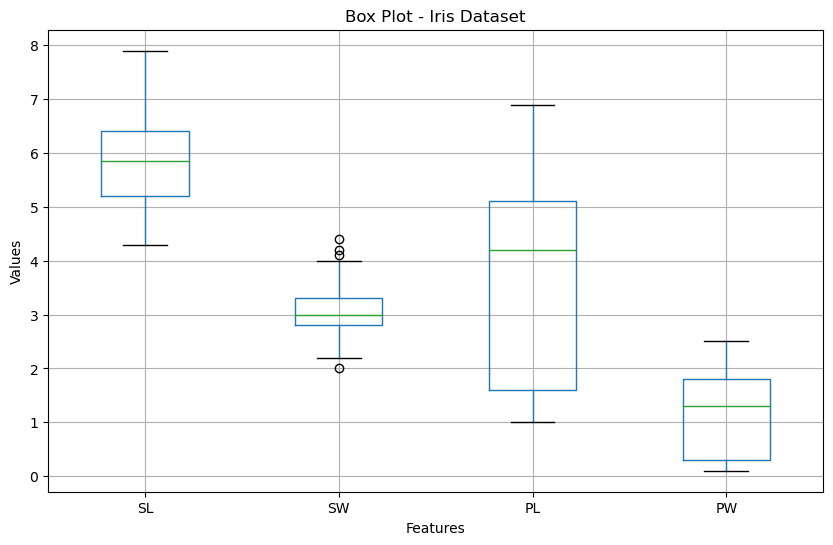

In [85]:
# Create a box plot for each feature
plt.figure(figsize=(10, 6))
df.boxplot(column=['SL', 'SW', 'PL', 'PW'])
plt.title('Box Plot - Iris Dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [86]:
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Classification'])

# Separate features and target variable
X = df[['SL', 'SW', 'PL', 'PW']]
y = df['Class']

In [92]:
df.head()

,SL,SW,PL,PW,Classification,Class
0,5.100000,3.5,1.4,0.2,Iris-setosa,0
1,4.900000,3.0,1.4,0.2,Iris-setosa,0
2,5.855944,3.2,1.3,0.2,Iris-setosa,0
3,4.600000,3.1,1.5,0.2,Iris-setosa,0
4,5.000000,3.6,1.4,0.2,Iris-setosa,0


# Step 3: Implement classification models and evaluate their performance

In [99]:
X = df[['SL', 'SW', 'PL', 'PW']]  
y = df['Class']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [106]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}


for name, metrics in results.items():
    print(f"Metrics for {name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1-score: {metrics['F1-score']}")
    print("")

# Find the best model based on the evaluation metric
best_model = max(results, key=lambda x: results[x]['Accuracy'])

# Justification for selecting the best model
print(f"The best model is {best_model} based on accuracy.")

C:\Users\musta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Metrics for Logistic Regression:
Accuracy: 0.9333333333333333
Precision: 0.9325476992143659
Recall: 0.9333333333333333
F1-score: 0.9322015182884746

Metrics for KNN:
Accuracy: 0.9555555555555556
Precision: 0.9555555555555556
Recall: 0.9555555555555556
F1-score: 0.9555555555555556

Metrics for Decision Tree:
Accuracy: 0.9555555555555556
Precision: 0.9555555555555556
Recall: 0.9555555555555556
F1-score: 0.9555555555555556

Metrics for Random Forest:
Accuracy: 0.9555555555555556
Precision: 0.9555555555555556
Recall: 0.9555555555555556
F1-score: 0.9555555555555556

Metrics for SVM:
Accuracy: 0.9555555555555556
Precision: 0.9555555555555556
Recall: 0.9555555555555556
F1-score: 0.9555555555555556

The best model is KNN based on accuracy.
